In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Paths to Files

In [2]:
BASE_DIR_PATH = '/Users/neilb/Documents/dsci_thesis/'
DATA_PATH = 'Scraping_and_Cleaning'

In [3]:
DATASET_FILE = os.path.join(BASE_DIR_PATH, DATA_PATH, 'data_2022.csv')

## Load Dataset

In [4]:
df = pd.read_csv(DATASET_FILE)
df['datetime'] = pd.to_datetime(df['datetime']) # parsing column to datetime as it is read as string
df.head()

,datetime,water_level,station,1hr,3hr,6hr,12hr,24hr
0,2022-01-01,11.64,Airport (PAGASA),0.0,0.0,0.0,0.0,0.0
1,2022-01-01,11.64,Antipolo,0.0,0.0,0.0,0.0,0.0
2,2022-01-01,11.64,Bagong Nayon,0.0,0.0,0.0,0.0,0.0
3,2022-01-01,11.64,Boso Boso,0.0,0.0,0.0,0.0,0.0
4,2022-01-01,11.64,Calawis,0.0,0.0,0.0,0.0,0.0


## Basic dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227786 entries, 0 to 227785
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     227786 non-null  datetime64[ns]
 1   water_level  227786 non-null  float64       
 2   station      227786 non-null  object        
 3   1hr          227786 non-null  float64       
 4   3hr          227786 non-null  float64       
 5   6hr          227786 non-null  float64       
 6   12hr         227786 non-null  float64       
 7   24hr         227786 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13.9+ MB


In [6]:
df.describe()

,water_level,1hr,3hr,6hr,12hr,24hr
count,227786.000000,227786.000000,227786.000000,227786.000000,227786.000000,227786.000000
mean,11.822432,0.212392,0.637735,1.275366,2.550725,5.101611
std,0.714462,1.760464,3.715819,5.821120,9.058985,14.045297
min,10.980000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.280000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.590000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.240000,0.000000,0.000000,0.000000,0.000000,2.500000
max,18.500000,97.000000,161.500000,163.000000,163.000000,209.000000


## Trials on Correlation

### Normal Column-pairwise Pearson Correlation

In [7]:
stations = df['station'].unique()

for station in stations:
    df_subset = df[df['station'] == station]
    print(f'{station}\n{df_subset.corr()}\n\n')
    
# Sitio Wawa has highest correlation between water level and 24hr rain

Airport (PAGASA)
             water_level       1hr       3hr       6hr      12hr      24hr
water_level     1.000000  0.193161  0.298268  0.386718  0.469052  0.513460
1hr             0.193161  1.000000  0.572381  0.397310  0.328206  0.249952
3hr             0.298268  0.572381  1.000000  0.782216  0.597803  0.442086
6hr             0.386718  0.397310  0.782216  1.000000  0.798942  0.599157
12hr            0.469052  0.328206  0.597803  0.798942  1.000000  0.796749
24hr            0.513460  0.249952  0.442086  0.599157  0.796749  1.000000


Antipolo
             water_level       1hr       3hr       6hr      12hr      24hr
water_level     1.000000  0.155895  0.252754  0.347149  0.433523  0.485488
1hr             0.155895  1.000000  0.680736  0.499851  0.374608  0.278407
3hr             0.252754  0.680736  1.000000  0.784711  0.586232  0.435466
6hr             0.347149  0.499851  0.784711  1.000000  0.780530  0.585460
12hr            0.433523  0.374608  0.586232  0.780530  1.000000  0.7852

Port Area Synop
             water_level       1hr       3hr       6hr      12hr      24hr
water_level     1.000000  0.177505  0.271138  0.351871  0.430885  0.484508
1hr             0.177505  1.000000  0.664605  0.499244  0.373798  0.277504
3hr             0.271138  0.664605  1.000000  0.783941  0.590972  0.435055
6hr             0.351871  0.499244  0.783941  1.000000  0.788548  0.582662
12hr            0.430885  0.373798  0.590972  0.788548  1.000000  0.778749
24hr            0.484508  0.277504  0.435055  0.582662  0.778749  1.000000


San Mateo-2
             water_level       1hr       3hr       6hr      12hr      24hr
water_level     1.000000  0.183322  0.293774  0.392626  0.495021  0.561615
1hr             0.183322  1.000000  0.670335  0.489411  0.360580  0.262581
3hr             0.293774  0.670335  1.000000  0.776941  0.575040  0.416419
6hr             0.392626  0.489411  0.776941  1.000000  0.775678  0.563725
12hr            0.495021  0.360580  0.575040  0.775678  1.000000  0.76

### Viewing Station with highest correlation between water level and 24hr rainfall

In [8]:
temp_df = df[df['station']=='Sitio Wawa']
temp_df

,datetime,water_level,station,1hr,3hr,6hr,12hr,24hr
23,2022-01-01 00:00:00,11.64,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
49,2022-01-01 01:00:00,11.61,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
75,2022-01-01 02:00:00,11.58,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
101,2022-01-01 03:00:00,11.55,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
127,2022-01-01 04:00:00,11.49,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
227679,2022-12-31 20:00:00,12.11,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
227705,2022-12-31 21:00:00,12.11,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
227731,2022-12-31 22:00:00,12.09,Sitio Wawa,0.0,0.0,0.0,0.0,0.0
227757,2022-12-31 23:00:00,12.09,Sitio Wawa,0.0,0.0,0.0,0.0,0.0


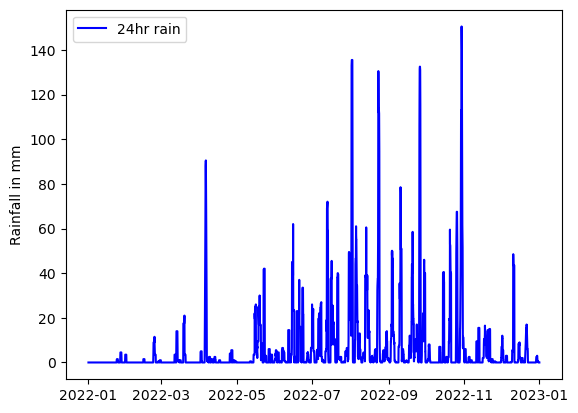

In [9]:
#plt.plot(temp_df['datetime'], temp_df['water_level'], label='water level', color='green')
plt.plot(temp_df['datetime'], temp_df['24hr'], label='24hr rain', color='blue')
plt.ylabel('Rainfall in mm')
plt.legend()
plt.show()

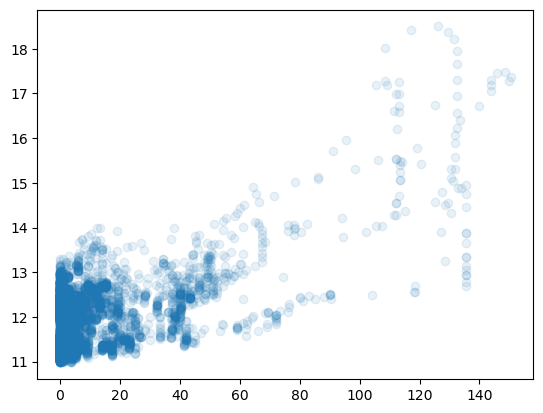

In [10]:
plt.scatter(temp_df['24hr'], temp_df['water_level'], alpha=0.1)
plt.show()

### Removing zeroes for Sitio Wawa then getting correlations

In [11]:
no_zero_1hr = temp_df['1hr'] != 0
no_zero_3hr = temp_df['3hr'] != 0
no_zero_6hr = temp_df['6hr'] != 0
no_zero_12hr = temp_df['12hr'] != 0
no_zero_24hr = temp_df['24hr'] != 0

temp_df_no_zero = temp_df[no_zero_1hr & no_zero_3hr & no_zero_6hr & no_zero_12hr & no_zero_24hr]
temp_df_no_zero

,datetime,water_level,station,1hr,3hr,6hr,12hr,24hr
14245,2022-01-23 19:00:00,11.37,Sitio Wawa,1.0,1.0,1.0,1.0,1.0
14349,2022-01-23 23:00:00,11.38,Sitio Wawa,0.5,0.5,1.5,1.5,1.5
16039,2022-01-26 16:00:00,11.38,Sitio Wawa,1.0,1.0,1.0,1.0,1.0
16091,2022-01-26 18:00:00,11.45,Sitio Wawa,3.0,4.0,4.0,4.0,4.0
16117,2022-01-26 19:00:00,11.43,Sitio Wawa,0.5,3.5,4.5,4.5,4.5
...,...,...,...,...,...,...,...,...
221335,2022-12-21 16:00:00,12.37,Sitio Wawa,5.0,6.0,6.0,6.5,17.0
226093,2022-12-29 07:00:00,12.11,Sitio Wawa,0.5,0.5,0.5,0.5,0.5
226119,2022-12-29 08:00:00,12.10,Sitio Wawa,1.0,1.5,1.5,1.5,1.5
226145,2022-12-29 09:00:00,12.09,Sitio Wawa,1.0,2.5,2.5,2.5,2.5


In [12]:
temp_df_no_zero.describe()

,water_level,1hr,3hr,6hr,12hr,24hr
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,12.477259,3.479403,7.976562,12.426136,18.196733,25.166903
std,1.251332,5.889989,11.590105,17.608702,25.356323,32.226475
min,11.020000,0.500000,0.500000,0.500000,0.500000,0.500000
25%,11.737500,0.500000,1.000000,1.500000,2.500000,3.500000
50%,12.250000,1.000000,3.500000,5.500000,7.500000,12.000000
75%,12.710000,3.500000,9.500000,15.500000,23.000000,37.000000
max,18.500000,54.000000,97.000000,115.500000,135.500000,150.500000


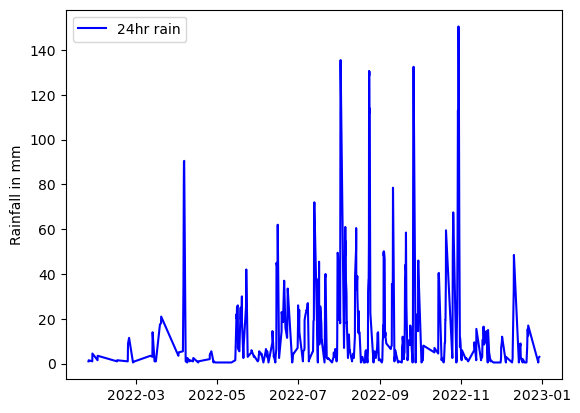

In [13]:
plt.plot(temp_df_no_zero['datetime'], temp_df_no_zero['24hr'], label='24hr rain', color='blue')
plt.ylabel('Rainfall in mm')
plt.legend()
plt.show()

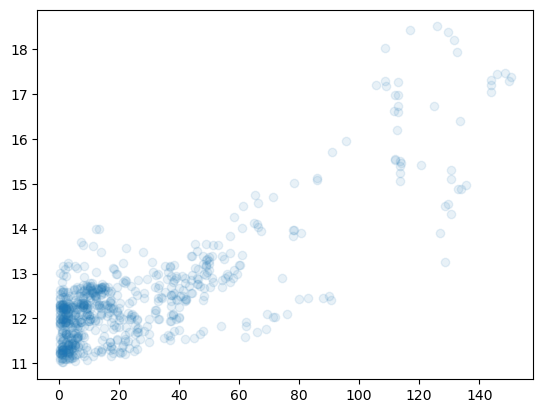

In [14]:
plt.scatter(temp_df_no_zero['24hr'], temp_df_no_zero['water_level'], alpha=0.1)
plt.show()

In [15]:
print(f'Sitio Wawa\n{temp_df_no_zero.corr()}')
# removing 0's improved correlations

Sitio Wawa
             water_level       1hr       3hr       6hr      12hr      24hr
water_level     1.000000  0.106462  0.320836  0.544642  0.742152  0.814523
1hr             0.106462  1.000000  0.689819  0.485127  0.335508  0.295399
3hr             0.320836  0.689819  1.000000  0.824574  0.626495  0.549554
6hr             0.544642  0.485127  0.824574  1.000000  0.851503  0.752277
12hr            0.742152  0.335508  0.626495  0.851503  1.000000  0.907216
24hr            0.814523  0.295399  0.549554  0.752277  0.907216  1.000000


### Removing 0's from whole dataframe before getting correlations

In [16]:
no_zero_1hr = df['1hr'] != 0
no_zero_3hr = df['3hr'] != 0
no_zero_6hr = df['6hr'] != 0
no_zero_12hr = df['12hr'] != 0
no_zero_24hr = df['24hr'] != 0

df_no_zero = df[no_zero_1hr & no_zero_3hr & no_zero_6hr & no_zero_12hr & no_zero_24hr]

for station in stations:
    df_no_zero_subset = df_no_zero[df_no_zero['station'] == station]
    print(f'{station}\n{df_no_zero_subset.corr()}\n\n')
    
# Pintong Bukawe has highest correlation between water level and 24hr rain

Airport (PAGASA)
             water_level       1hr       3hr       6hr      12hr      24hr
water_level     1.000000  0.218995  0.317620  0.492515  0.630448  0.627015
1hr             0.218995  1.000000  0.572801  0.454559  0.390858  0.303680
3hr             0.317620  0.572801  1.000000  0.843643  0.664049  0.517258
6hr             0.492515  0.454559  0.843643  1.000000  0.861258  0.714246
12hr            0.630448  0.390858  0.664049  0.861258  1.000000  0.887349
24hr            0.627015  0.303680  0.517258  0.714246  0.887349  1.000000


Antipolo
             water_level       1hr       3hr       6hr      12hr      24hr
water_level     1.000000  0.074775  0.278155  0.494826  0.631467  0.699822
1hr             0.074775  1.000000  0.640523  0.453954  0.308644  0.233917
3hr             0.278155  0.640523  1.000000  0.818822  0.615484  0.495676
6hr             0.494826  0.453954  0.818822  1.000000  0.838363  0.711096
12hr            0.631467  0.308644  0.615484  0.838363  1.000000  0.8878

In [17]:
df_no_zero.describe()

,water_level,1hr,3hr,6hr,12hr,24hr
count,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000
mean,12.568643,3.865937,8.611692,12.562042,17.667337,24.386578
std,1.309586,6.489066,11.691089,15.745047,21.809920,29.000215
min,11.010000,0.500000,0.500000,0.500000,0.500000,0.500000
25%,11.780000,0.500000,1.000000,2.000000,2.500000,4.000000
50%,12.290000,1.500000,4.000000,6.000000,8.500000,13.000000
75%,12.810000,4.000000,11.000000,17.500000,25.000000,35.000000
max,18.500000,97.000000,161.500000,163.000000,163.000000,209.000000


## Multiple Linear Regression

In [18]:
temp_df_2=df_no_zero[df_no_zero['station']=='Pintong Bukawe']
temp_df_2

,datetime,water_level,station,1hr,3hr,6hr,12hr,24hr
30230,2022-02-18 10:00:00,11.05,Pintong Bukawe,3.5,3.5,3.5,3.5,3.5
30256,2022-02-18 11:00:00,11.07,Pintong Bukawe,0.5,4.0,4.0,4.0,4.0
30282,2022-02-18 12:00:00,11.10,Pintong Bukawe,7.5,11.5,11.5,11.5,11.5
30308,2022-02-18 13:00:00,11.13,Pintong Bukawe,1.0,9.0,12.5,12.5,12.5
54228,2022-03-28 21:00:00,11.29,Pintong Bukawe,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
214518,2022-12-10 18:00:00,12.68,Pintong Bukawe,5.0,5.5,5.5,5.5,7.0
214544,2022-12-10 19:00:00,12.64,Pintong Bukawe,37.0,42.5,42.5,42.5,44.0
214570,2022-12-10 20:00:00,12.42,Pintong Bukawe,16.5,58.5,59.0,59.0,60.5
214596,2022-12-10 21:00:00,12.51,Pintong Bukawe,0.5,54.0,59.5,59.5,61.0


In [20]:
X = temp_df_2.iloc[:,3:8]
X

,1hr,3hr,6hr,12hr,24hr
30230,3.5,3.5,3.5,3.5,3.5
30256,0.5,4.0,4.0,4.0,4.0
30282,7.5,11.5,11.5,11.5,11.5
30308,1.0,9.0,12.5,12.5,12.5
54228,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...
214518,5.0,5.5,5.5,5.5,7.0
214544,37.0,42.5,42.5,42.5,44.0
214570,16.5,58.5,59.0,59.0,60.5
214596,0.5,54.0,59.5,59.5,61.0


In [23]:
y = temp_df_2.iloc[:, 1]
y

30230     11.05
30256     11.07
30282     11.10
30308     11.13
54228     11.29
          ...  
214518    12.68
214544    12.64
214570    12.42
214596    12.51
214804    12.43
Name: water_level, Length: 261, dtype: float64

In [24]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [25]:
model.score(X,y) #R squared

0.8093116399652062

In [27]:
model.coef_

array([-0.01764951, -0.055263  ,  0.03923418,  0.00429856,  0.02851616])

In [28]:
model.intercept_

11.846213727921597

### With Interaction Term

In [34]:
interaction_term = PolynomialFeatures(interaction_only=True)
X = interaction_term.fit_transform(X)

In [35]:
model.fit(X,y)

LinearRegression()

In [36]:
model.score(X,y) #R squared

0.8278916104721161

In [45]:
coef = model.coef_
coef

array([ 0.00000000e+00, -2.54619743e-02, -6.93289926e-02,  5.40632720e-02,
        7.04128123e-03,  2.20156111e-02, -1.60397126e-03,  3.77753756e-03,
       -3.02721164e-03,  9.87099055e-04, -7.05974032e-04,  3.71021719e-04,
        4.41814759e-04, -9.56606965e-05, -1.45265072e-04,  4.40243849e-05])

In [38]:
model.intercept_

11.893355876054414

In [47]:
predictors = interaction_term.get_feature_names_out()
predictors

array(['1', '1hr', '3hr', '6hr', '12hr', '24hr', '1hr 3hr', '1hr 6hr',
       '1hr 12hr', '1hr 24hr', '3hr 6hr', '3hr 12hr', '3hr 24hr',
       '6hr 12hr', '6hr 24hr', '12hr 24hr'], dtype=object)

In [48]:
for i in range(len(model.coef_)):
    print(f'{predictors[i]}: {coef[i]:.4f}')

1: 0.0000
1hr: -0.0255
3hr: -0.0693
6hr: 0.0541
12hr: 0.0070
24hr: 0.0220
1hr 3hr: -0.0016
1hr 6hr: 0.0038
1hr 12hr: -0.0030
1hr 24hr: 0.0010
3hr 6hr: -0.0007
3hr 12hr: 0.0004
3hr 24hr: 0.0004
6hr 12hr: -0.0001
6hr 24hr: -0.0001
12hr 24hr: 0.0000
